# Hypothesis Testing: Correlation

In [2]:
%matplotlib inline
from math import sqrt

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.ion()
plt.rc('figure', figsize=(13, 7))

## Hypothesis Testing Review / Recap

### Limits of Hypothesis Testing

- Hypothesis provides statistical evidence to tell us whether the results we are seeing are due to chance
- Very important for, e.g., RCTs w/ a small n
- With a large n, almost everything is statistically significant
- Doesn't say anything about effect size
- **Never** do stats testing in isolation, it's a supporting piece of evidence, but must be combined w/ other analysis and viz to support business intelligence

### Hypothesis Testing Simulation Based Demo

- What is a probability? A frequency
- probabilities tell us what % of possible universes contain that outcome
- what's a p-value? P(data | H0) (or more extreme data)
- what are simulations? a way to calculate probability
- simulations represent one universe in the multiverse

Let's say we have 2 groups: virtual students and in-person students and we want to examine their scores on the stortelling project. If it truly is the case that there is no difference between these groups, how likely is it that we observe one?

In [27]:
def plot_stripplot_and_sample(ax, df, sample):
    sns.stripplot(data=df, y='student_type', x='grade', color='black', alpha=.1, ax=ax)
    sns.stripplot(
        data=sample, y='student_type', x='grade', ax=ax,
    )
    t, p = stats.ttest_ind(
        sample[sample.student_type == 'Virtual'].grade,
        sample[sample.student_type == 'In-Person'].grade
    )
    ax.set_title(f'p = {p:.4f}')
    return ax

def viz_student_grades_df(df):
    sns.stripplot(data=df, y='student_type', x='grade', color='black', alpha=.5).set_title('Actual Grade Distribution')

    fig, axs = plt.subplots(4, 4, figsize=(24, 14), sharex=True, sharey=True, facecolor='white')
    for ax in axs.ravel()[:-1]:
        sample = df.sample(25)
        plot_stripplot_and_sample(ax, df, sample)

    plot_stripplot_and_sample(axs.ravel()[-1], df, df.sample(25, random_state=503))
    fig.tight_layout()
    

0.044

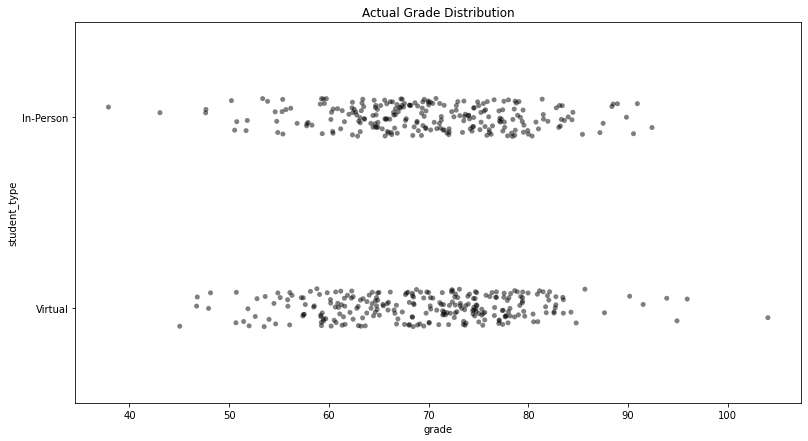

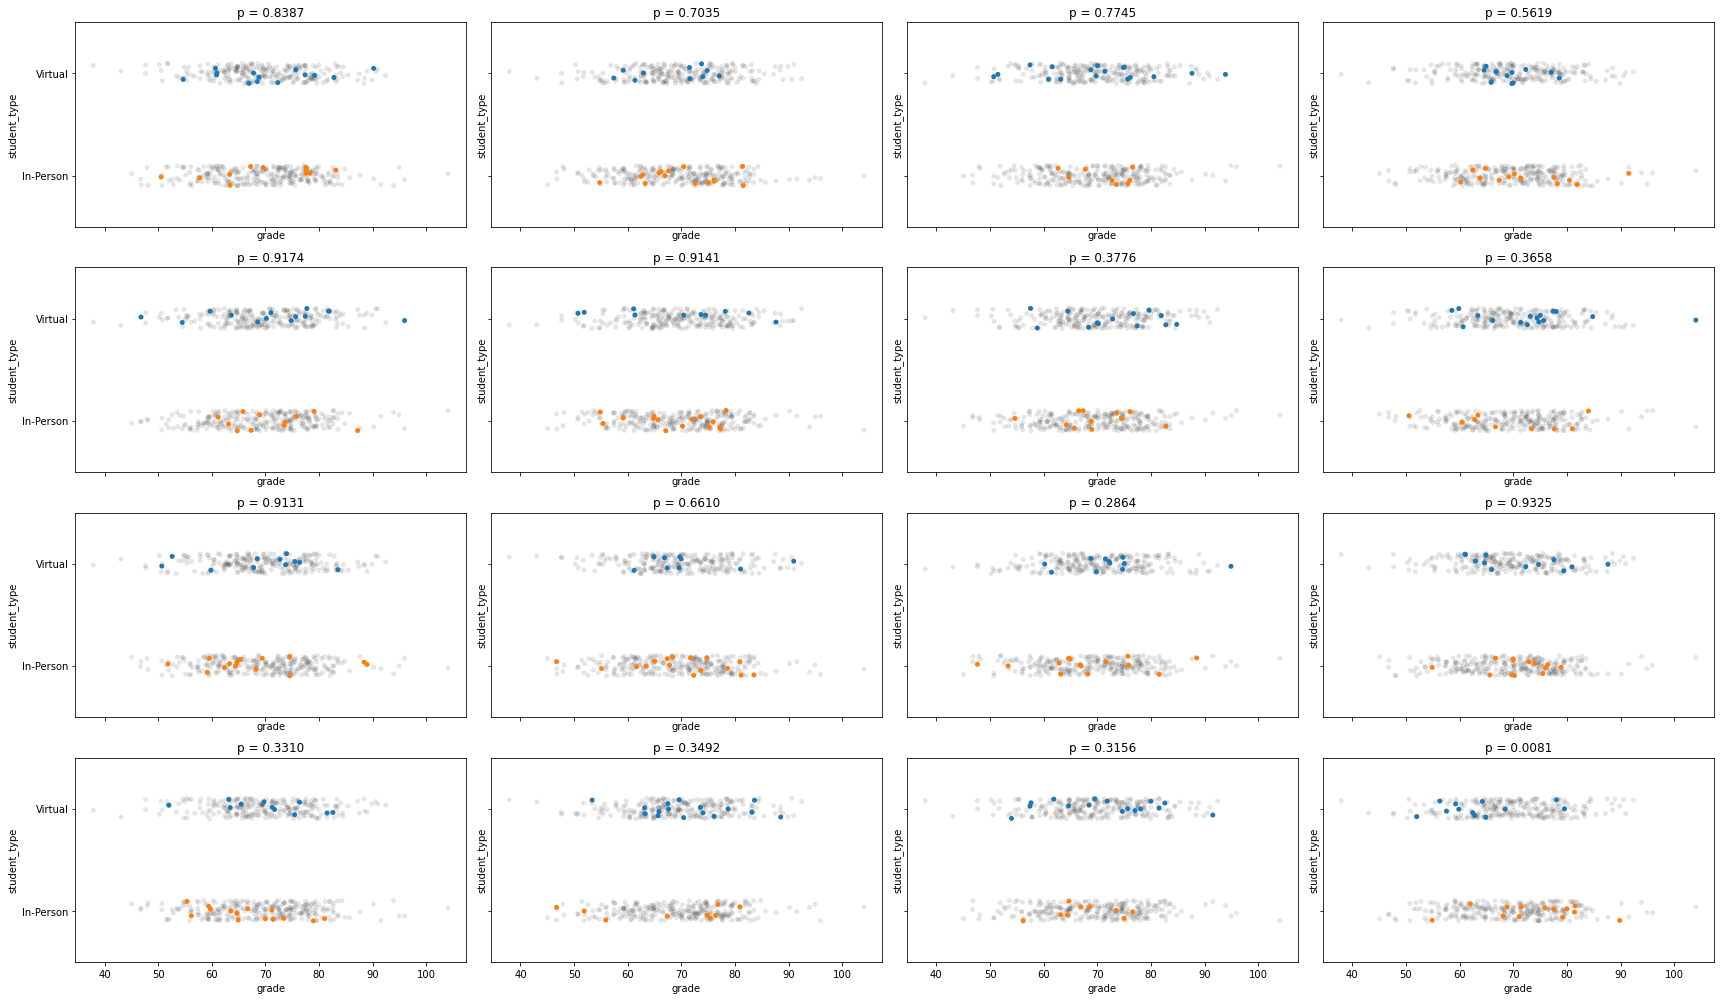

In [28]:
np.random.seed(13)

df = pd.DataFrame()
df['grade'] = np.random.normal(70, 10, 500)
df['student_type'] = np.random.choice(['Virtual', 'In-Person'], 500)
viz_student_grades_df(df)

n_sims = 1000
simulation_results = []

for _ in range(n_sims):
    sample = df.sample(25)
    virtual_students = sample[sample.student_type == 'Virtual']
    in_person_students = sample[sample.student_type == 'In-Person']
    h_test_results = stats.ttest_ind(virtual_students.grade, in_person_students.grade)
    simulation_results.append(h_test_results)

(pd.DataFrame(simulation_results).pvalue < .05).mean()

0.711

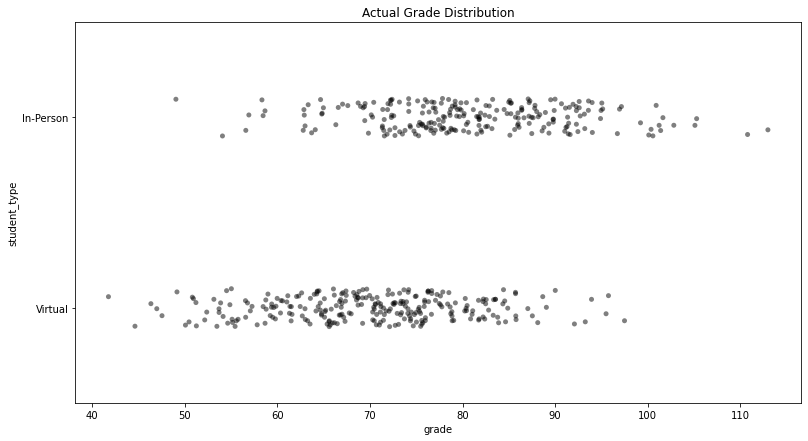

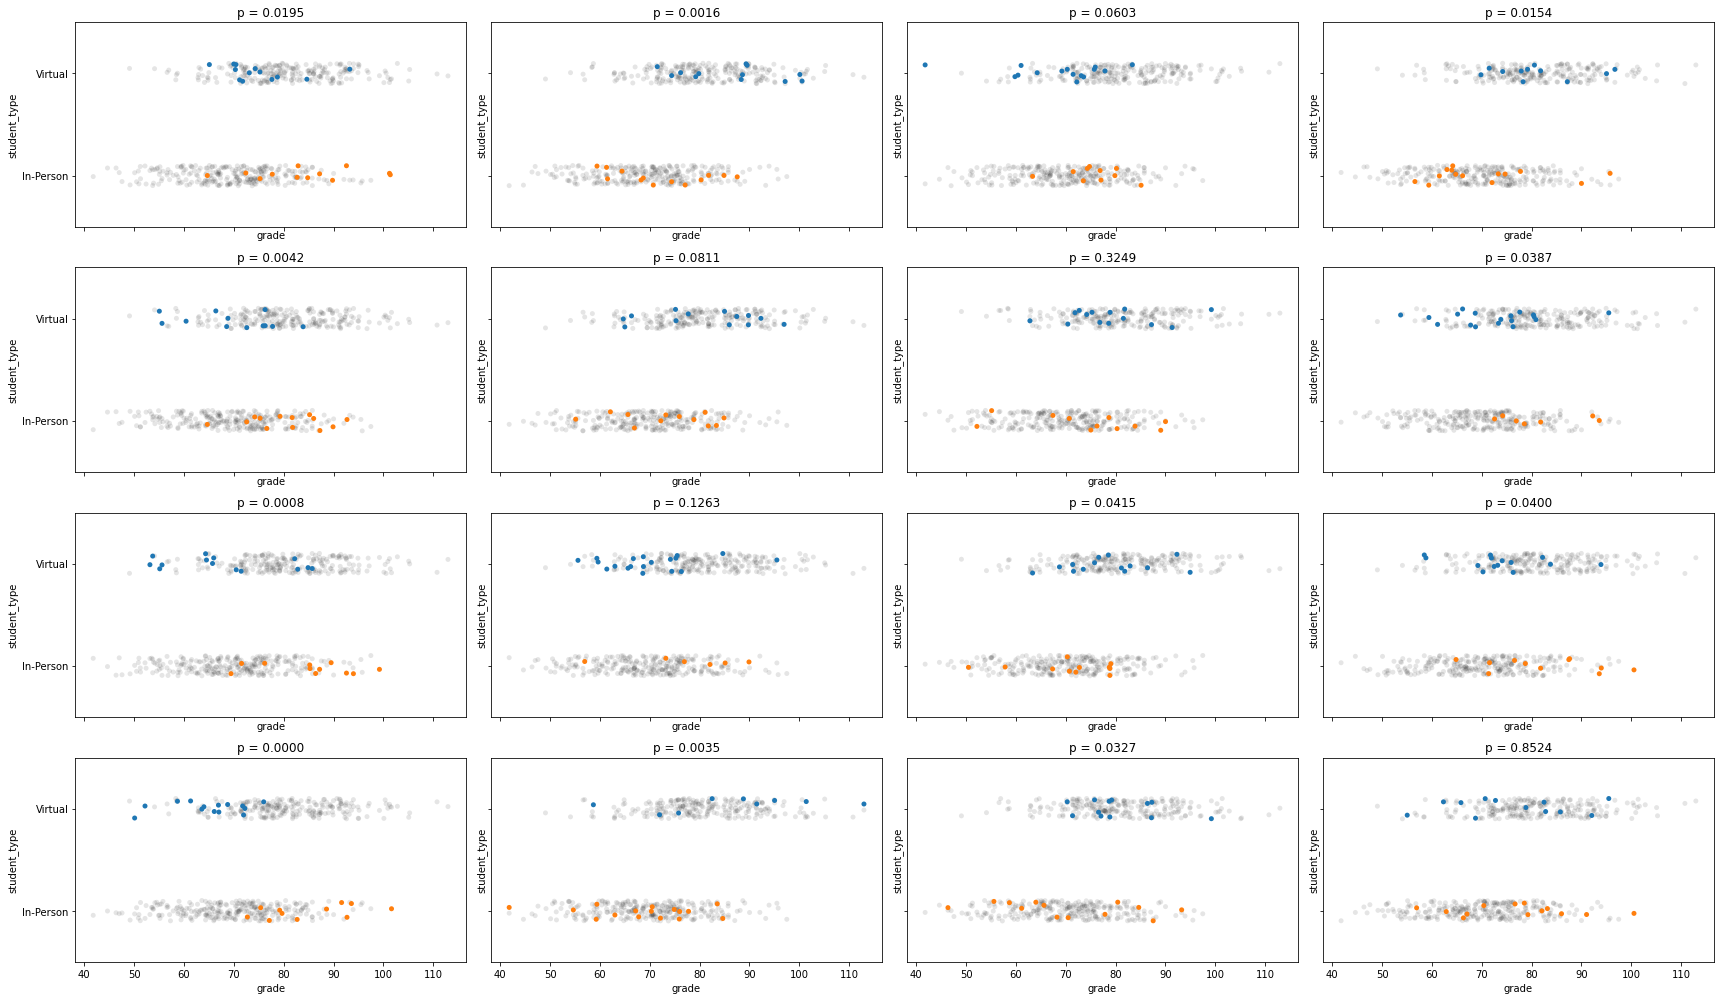

In [29]:
df = pd.DataFrame()
df['student_type'] = np.random.choice(['Virtual', 'In-Person'], 500)
df['grade'] = np.where(
    df.student_type == 'Virtual',
    np.random.normal(70, 10, 500),
    np.random.normal(80, 10, 500),
)

viz_student_grades_df(df)

n_sims = 1000
simulation_results = []

for _ in range(n_sims):
    sample = df.sample(25)
    virtual_students = sample[sample.student_type == 'Virtual']
    in_person_students = sample[sample.student_type == 'In-Person']
    h_test_results = stats.ttest_ind(virtual_students.grade, in_person_students.grade)
    simulation_results.append(h_test_results)

(pd.DataFrame(simulation_results).pvalue < .05).mean()

https://xkcd.com/882/

## Comparing 2 Continuous Variables: Correlation

- Pearson's correlation coefficient or **Pearson's r** is the test statistic we get from a correlation test
- For discrete or non-normal data: Spearman's rank correlation
- Compares 2 continuous variables
- Unitless; tells us how much two variables tend to move together
- $H_0$: there is no linear relationship between the two variables

In [2]:
url = "https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv"
df = pd.read_csv(url)
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


## Example Test

What's the relationship between exam score and hours studied?

<AxesSubplot:xlabel='hours_studied', ylabel='exam_score'>

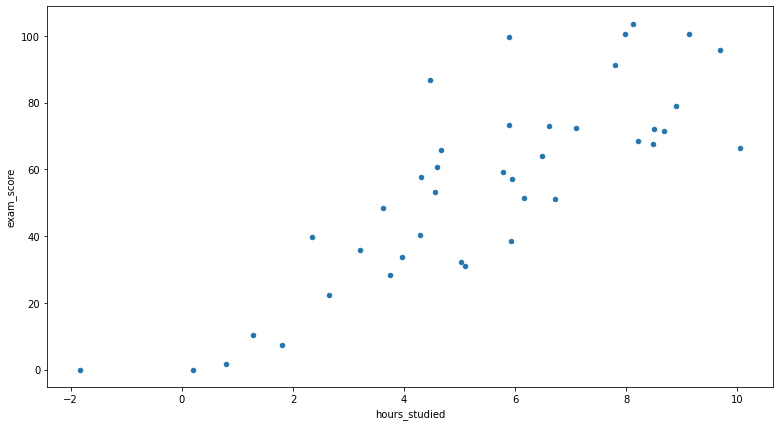

In [3]:
df.plot.scatter(y='exam_score', x='hours_studied')

Abbreviated Hypothesis Testing Procedure:

1. Setup
2. Calculate test statistic + p-value
3. Conclude

- $\alpha = .05$
- $H_0$: There is no linear relationship between exam score and number of hours studied.
- $H_a$: There is a linear relationship between exam score and number of hours studied.

In [4]:
x = df.hours_studied
y = df.exam_score

In [5]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.8351498542413307
p = 2.0762953315463046e-11


Conclusion: we reject the null hypothesis that there is no linear relationship between exam score and number of hours studied.

## Examples of Different Correlations

Text(0.5, 1.0, 'Perfect positive correlation, (r=1)')

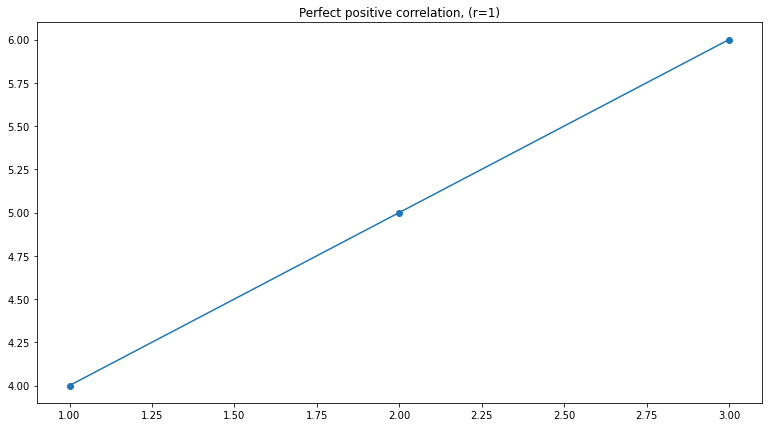

In [6]:
x = [1, 2, 3]
y = [4, 5, 6]

plt.plot(x, y, marker='o')
plt.title('Perfect positive correlation, (r=1)')

Text(0.5, 1.0, 'Perfect negative correlation (r=-1)')

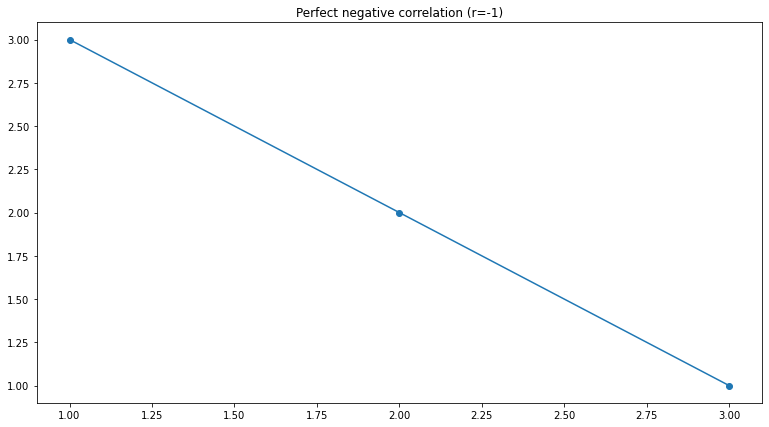

In [7]:
x = [3, 2, 1]
y = [1, 2, 3]

plt.plot(x, y, marker='o')
plt.title('Perfect negative correlation (r=-1)')

Text(0.5, 1.0, 'Absolutely no correlation (r=0)')

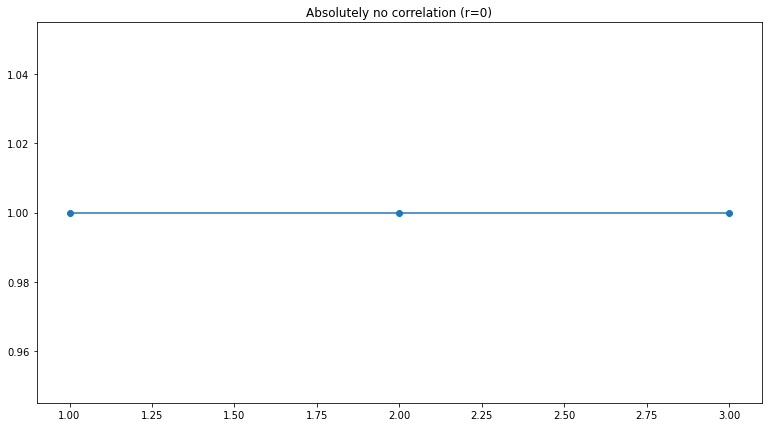

In [8]:
x = [1, 2, 3]
y = [1, 1, 1]

plt.plot(x, y, marker='o')
plt.title('Absolutely no correlation (r=0)')

Text(2.3398395550438065, 2.0033428280972623, 'r=-0.1394\np=0.1666')

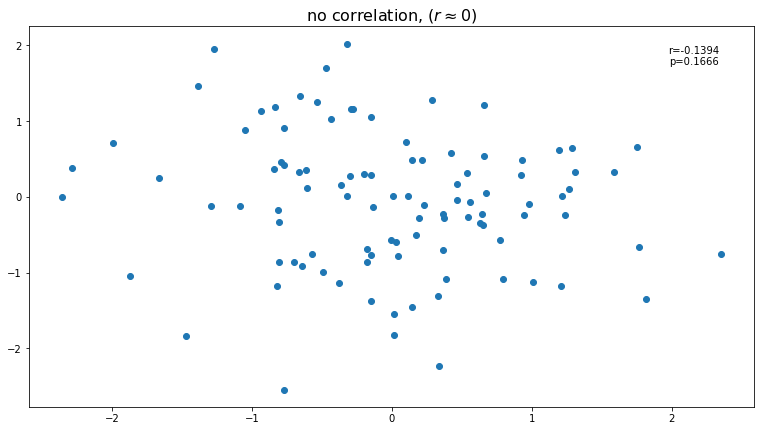

In [9]:
x = np.random.randn(100)
y = np.random.randn(100)

r, p = stats.pearsonr(x, y)

plt.scatter(x, y)
plt.title(r'no correlation, ($r \approx 0$)', size=16)
plt.text(plt.xlim()[-1] - .25, plt.ylim()[-1] - .25, f'{r=:.4}\n{p=:.4}', ha='right', va='top')

Text(1.9891044546641936, 3.8174256029322535, 'r=0.5818\np=0.0000')

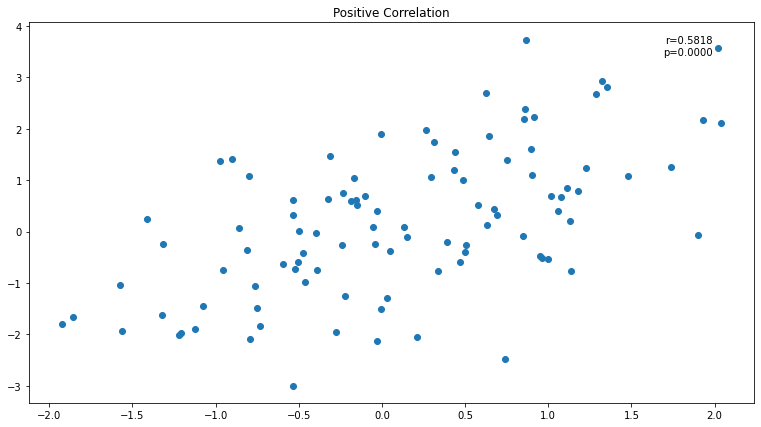

In [10]:
x = np.random.randn(100)
y = x + (np.random.randn(100) * 1.1)

r, p = stats.pearsonr(x, y)

plt.scatter(x, y)
plt.title('Positive Correlation')
plt.text(plt.xlim()[-1] - .25, plt.ylim()[-1] - .25, f'{r=:.4}\n{p=:.4f}', ha='right', va='top')

Text(2.5379423749514602, 3.8075784993380104, 'r=-0.7071\np=0.0000')

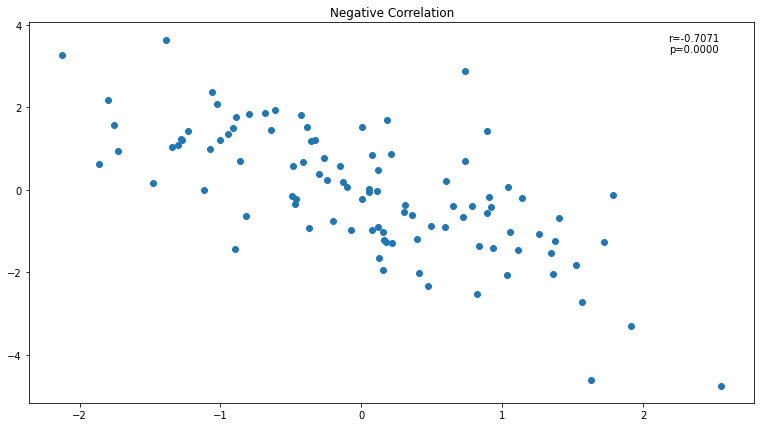

In [11]:
x = np.random.randn(100)
y = -x + (np.random.randn(100) * 1.1)

r, p = stats.pearsonr(x, y)

plt.scatter(x, y)
plt.title('Negative Correlation')
plt.text(plt.xlim()[-1] - .25, plt.ylim()[-1] - .25, f'{r=:.4}\n{p=:.4f}', ha='right', va='top')

## Correlation "gotchas"

When looking at correlation, keep in mind:

1. [Correlation is not causation!](https://xkcd.com/552/)
2. This is just looking at a linear relationship
3. Correlation itself just looks 2 variables, there could be more going on
4. Correlation doesn't tell us how large the relationship is

### Example: non-linear relationship

Text(0, 8, 'r=-0.0000\np=1.0000')

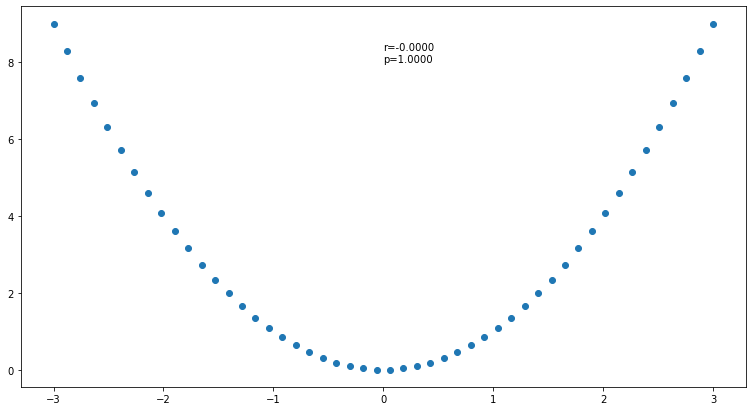

In [12]:
x = np.linspace(-3, 3)
y = x ** 2

r, p = stats.pearsonr(x, y)

plt.scatter(x, y)
plt.text(0, 8, f'{r=:.4f}\n{p=:.4f}')

### Example: confounding variable

r= -0.9937792168631223


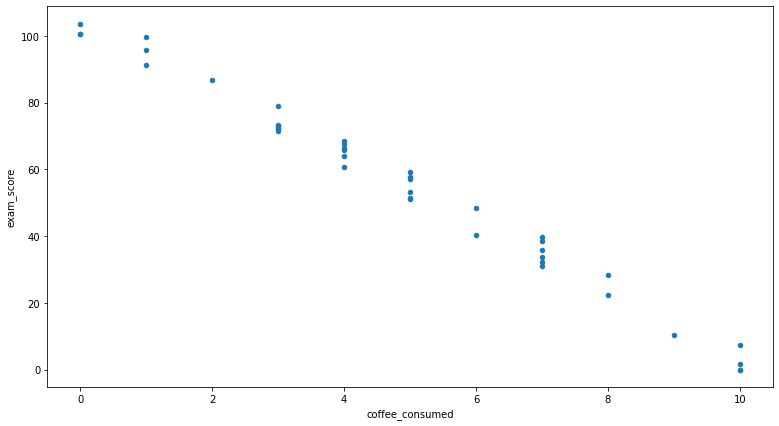

In [13]:
df.plot.scatter(y='exam_score', x='coffee_consumed')

r, p = stats.pearsonr(df.exam_score, df.coffee_consumed)
print('r=', r)

p= 2.577066311792091e-293
r= -0.9999999999999998


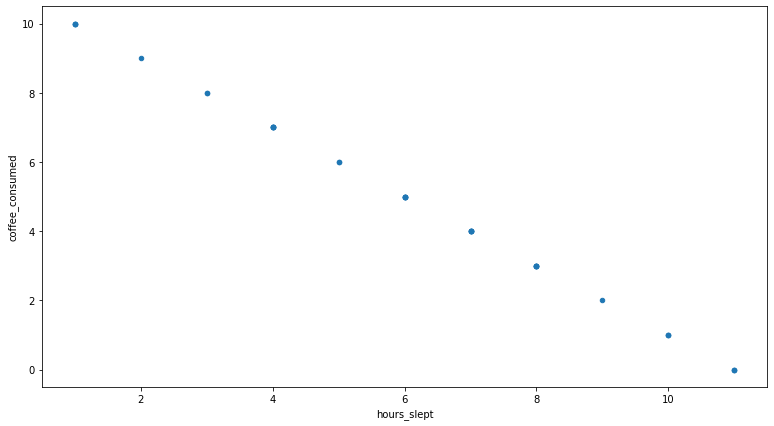

In [14]:
r, p = stats.pearsonr(df.coffee_consumed, df.hours_slept)
df.plot.scatter(y='coffee_consumed', x='hours_slept')
print('p=', p)
print('r=', r)

### Example: relationship magnitude

r= 1.0


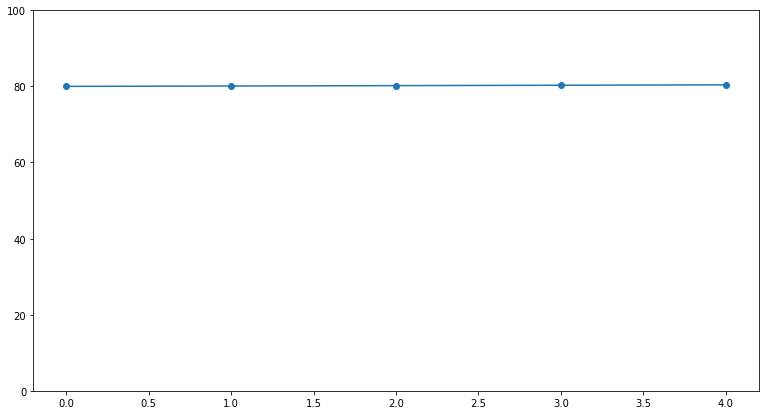

In [15]:
coffee_consumption = [0, 1, 2, 3, 4]
exam_score = [80, 80.1, 80.2, 80.3, 80.4]

r, p = stats.pearsonr(coffee_consumption, exam_score)

plt.plot(coffee_consumption, exam_score, marker='o')
plt.ylim(0, 100)
print('r=', r)

## Exercise Guidance

What does it mean to "control for"?

In [16]:
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


<AxesSubplot:xlabel='hours_studied', ylabel='exam_score'>

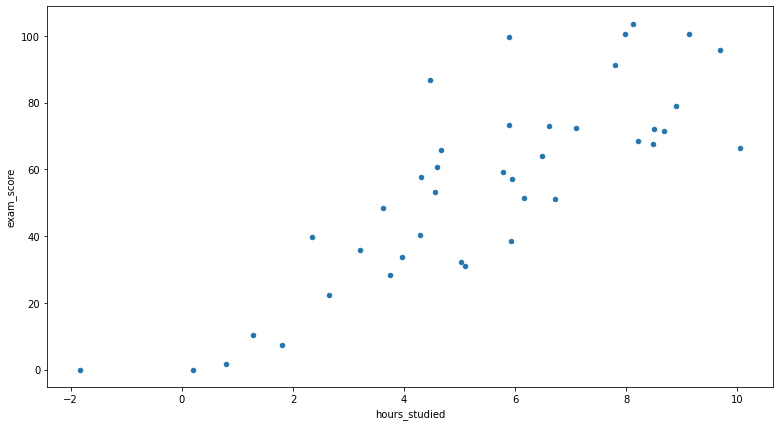

In [17]:
df.plot.scatter(y='exam_score', x='hours_studied')

In [18]:
import seaborn as sns

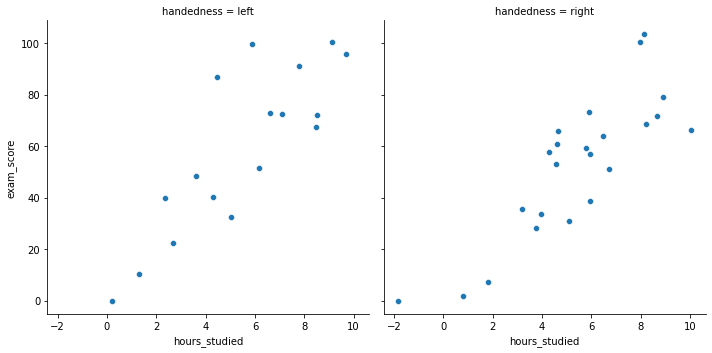

In [19]:
sns.relplot(data=df, y='exam_score', x='hours_studied', col='handedness')

In [20]:
lefties = df[df.handedness == 'left']
righties = df[df.handedness == 'right']

In [21]:
r, p = stats.pearsonr(lefties.exam_score, lefties.hours_studied)
print('Lefties')
print('  r =', r)
print('  p =', p)

Lefties
  r = 0.8389846518512478
  p = 2.561723682481375e-05


In [22]:
r, p = stats.pearsonr(righties.exam_score, righties.hours_studied)
print('Righties')
print('  r =', r)
print('  p =', p)

Righties
  r = 0.8407115600383273
  p = 5.114047317102283e-07


## Correlation Simulation Demo

In [6]:
def scatterplot_df_and_sample(ax, df, sample):
    r, p = stats.pearsonr(sample.x, sample.y)
    ax.set_title(f'r = {r:.4f}, p = {p:.4f}')
    ax.scatter(df.x, df.y, alpha=.3, color='orange')
    ax.scatter(sample.x, sample.y, color='blue')
    return ax

Text(0.5, 0.98, '$H_0$ is true')

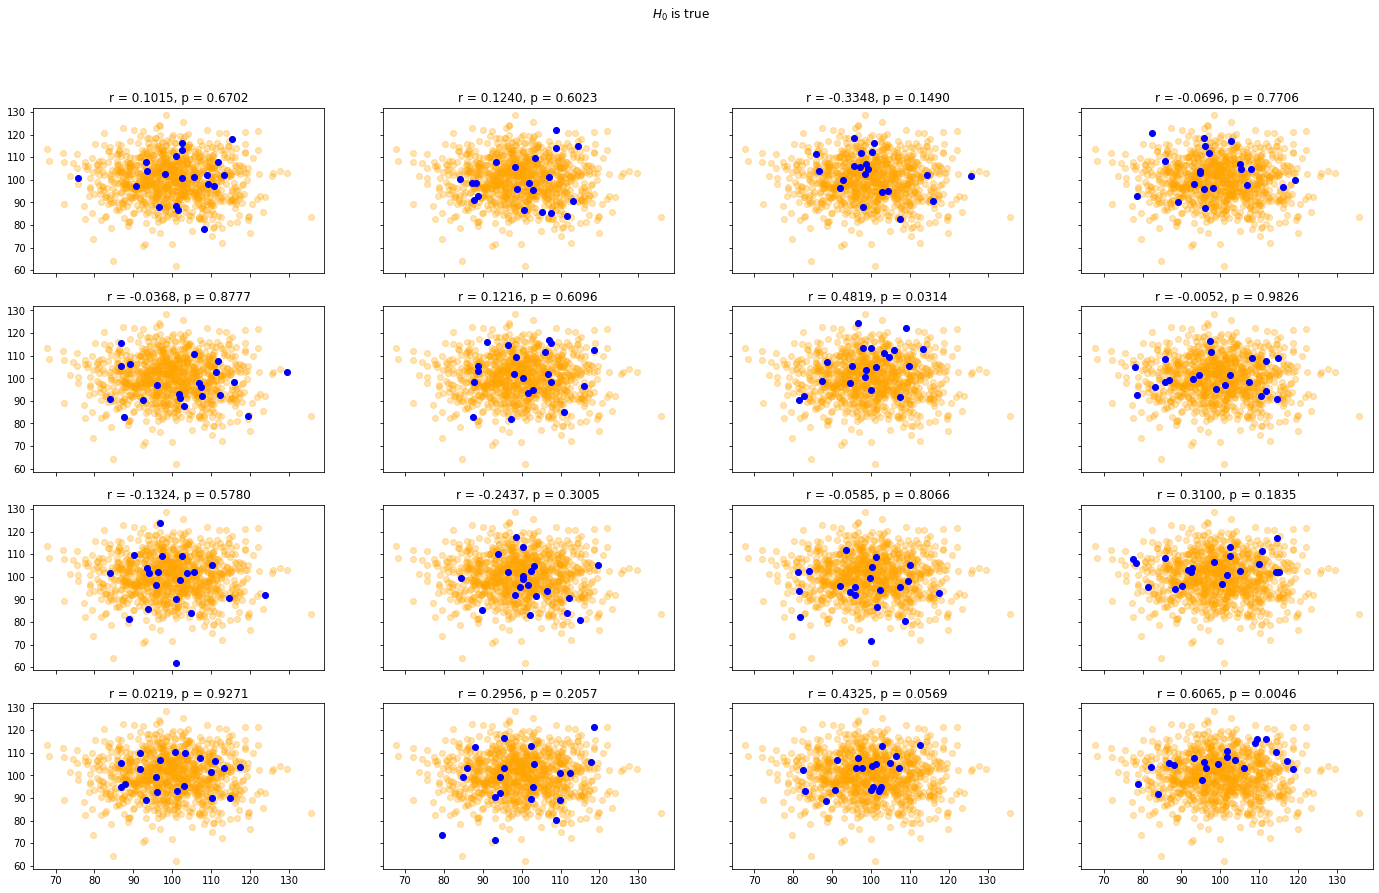

In [13]:
np.random.seed(123)

df = pd.DataFrame()
df['x'] = np.random.normal(100, 10, 1000)
df['y'] = np.random.normal(100, 10, 1000)

simulations = []
for _ in range(1000):
    sample = df.sample(20)
    simulations.append(stats.pearsonr(sample.x, sample.y))
(pd.DataFrame(simulations, columns=['r', 'p']).sort_values(by='p').p < .05).mean()

fig, axs = plt.subplots(4, 4, figsize=(24, 14), sharex=True, sharey=True)
axs = axs.ravel()

for ax in axs[:-1]:
    scatterplot_df_and_sample(ax, df, df.sample(20))

scatterplot_df_and_sample(axs[-1], df, df.sample(20, random_state=383))
fig.suptitle('$H_0$ is true')

Text(0.5, 0.98, '$H_0$ is false')

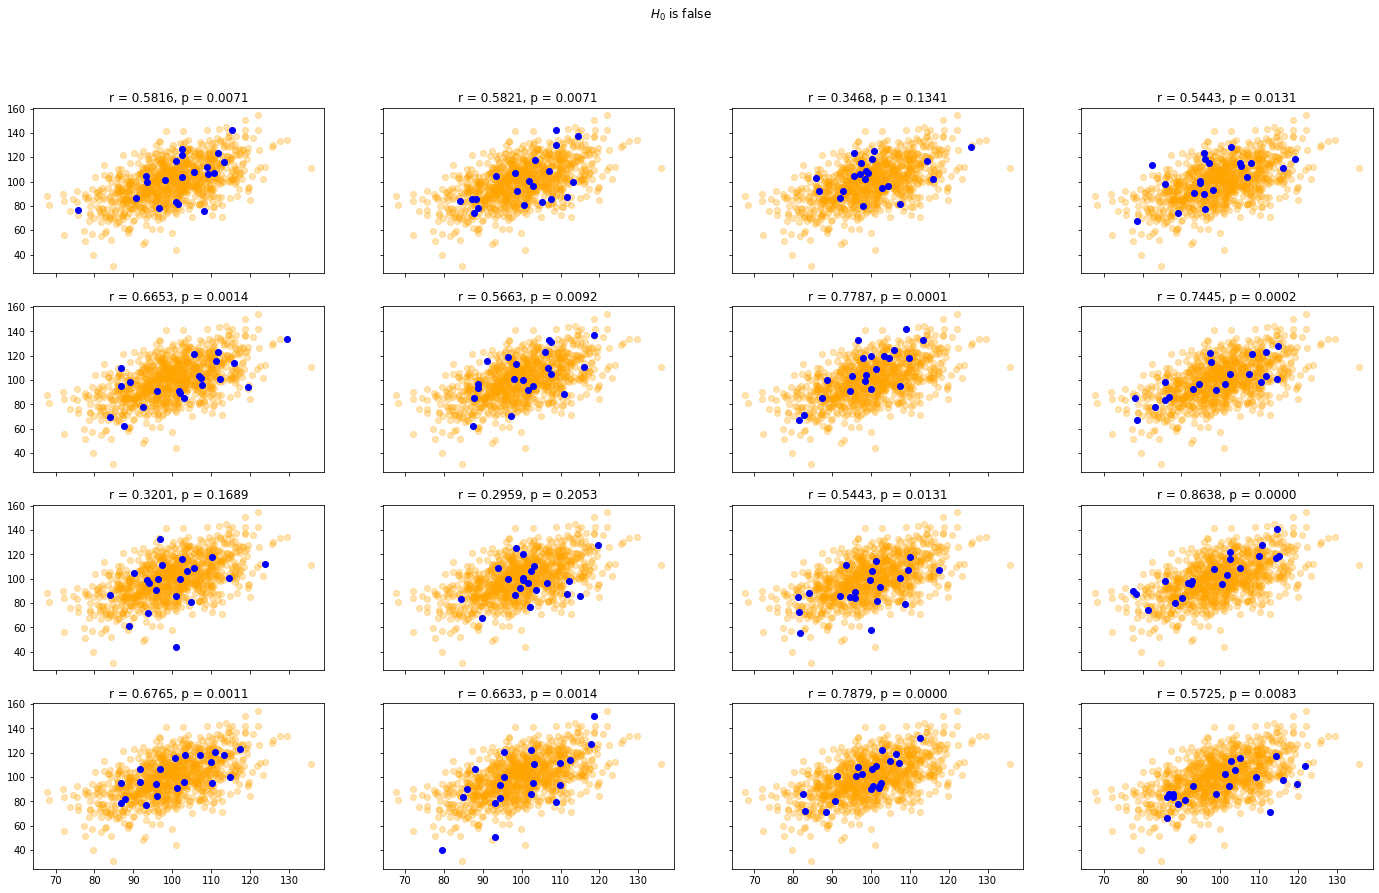

In [15]:
np.random.seed(123)

df = pd.DataFrame()
df['x'] = np.random.normal(100, 10, 1000)
df['y'] = df.x + np.random.normal(0, 15, 1000)

simulations = []
for _ in range(1000):
    sample = df.sample(20)
    simulations.append(stats.pearsonr(sample.x, sample.y))
(pd.DataFrame(simulations, columns=['r', 'p']).sort_values(by='p').p < .05).mean()

fig, axs = plt.subplots(4, 4, figsize=(24, 14), sharex=True, sharey=True)
axs = axs.ravel()

for ax in axs:
    scatterplot_df_and_sample(ax, df, df.sample(20))

fig.suptitle('$H_0$ is false')